In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
%matplotlib inline

In [94]:
#file = "DataAcquisitionMerging/startup_investment_world_data.xlsx"
file = "DataAcquisitionMerging/requireddata.xlsx"
pd.options.display.float_format = '{:.2f}'.format  # to get rid of large numbers in excel
funding_data = pd.read_excel(file,index=False)
funding_data = funding_data.loc[:, ~funding_data.columns.str.contains('^Unnamed')]


In [95]:
funding_data.head()

,company_name,company_market,company_city,investor_name,investor_market,investor_city,funding_round_type,funded_at,funded_quarter,funded_year,raised_amount_usd
0,Lenovo,Hardware,Morrisville,Chinese Academy Of Sciences,Education,Beijing,undisclosed,1984-01-01,1984-Q1,1984,12663383.67
1,Cisco,Software,San Jose,Sequoia Capital,Venture Capital,Menlo Park,venture,1987-01-01,1987-Q1,1987,2500000.00
2,Office Depot,E-Commerce,Boca Raton,Upfront Ventures,Finance,Los Angeles,undisclosed,1989-06-01,1989-Q2,1989,12663383.67
3,Market Wire,Advertising,El Segundo,Perkins Coie,Legal,Anchorage,venture,1990-11-30,1990-Q4,1990,17550000.00
4,Market Wire,Advertising,El Segundo,Sequoia Capital,Venture Capital,Menlo Park,venture,1990-11-30,1990-Q4,1990,17550000.00


### Find outliars in y= raised_amout_usd

In [96]:
acutal = []
def find_outliers(funding):
    population_mean = funding.mean()
    population_std = funding.std()
    anamoly_cut_off = population_std*3
    
    lower_limit = population_mean - anamoly_cut_off
    upper_limit = population_mean + anamoly_cut_off 
    for outlier in funding:
        if outlier < upper_limit and outlier > lower_limit:
            acutal.append(outlier)
    return acutal;


In [97]:
removed_outliers = find_outliers(funding_data['raised_amount_usd'])
len(removed_outliers)

26080

In [98]:
actual_data = funding_data[funding_data['raised_amount_usd'].isin(removed_outliers)];
filter_funds = pd.DataFrame(actual_data)


In [99]:
filter_funds.head()

,company_name,company_market,company_city,investor_name,investor_market,investor_city,funding_round_type,funded_at,funded_quarter,funded_year,raised_amount_usd
0,Lenovo,Hardware,Morrisville,Chinese Academy Of Sciences,Education,Beijing,undisclosed,1984-01-01,1984-Q1,1984,12663383.67
1,Cisco,Software,San Jose,Sequoia Capital,Venture Capital,Menlo Park,venture,1987-01-01,1987-Q1,1987,2500000.00
2,Office Depot,E-Commerce,Boca Raton,Upfront Ventures,Finance,Los Angeles,undisclosed,1989-06-01,1989-Q2,1989,12663383.67
3,Market Wire,Advertising,El Segundo,Perkins Coie,Legal,Anchorage,venture,1990-11-30,1990-Q4,1990,17550000.00
4,Market Wire,Advertising,El Segundo,Sequoia Capital,Venture Capital,Menlo Park,venture,1990-11-30,1990-Q4,1990,17550000.00


### Lets visulaize the data

#### By looking  scatter plot we can say at tech increase year by year the funding also get increase

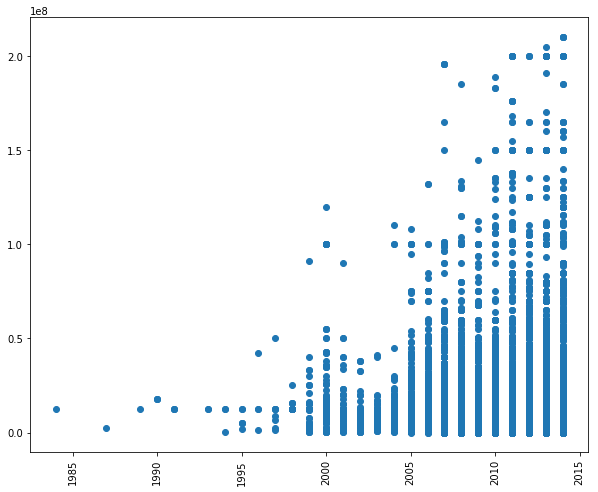

In [100]:
plt.figure(figsize=(10,8))
plt.xticks(rotation='vertical')
plt.scatter(filter_funds['funded_year'],filter_funds['raised_amount_usd'])

#### By looking  scatter plot we can most compnies get higher funds when funding type is 
#### venture
#### debt_financing
#### private_equity


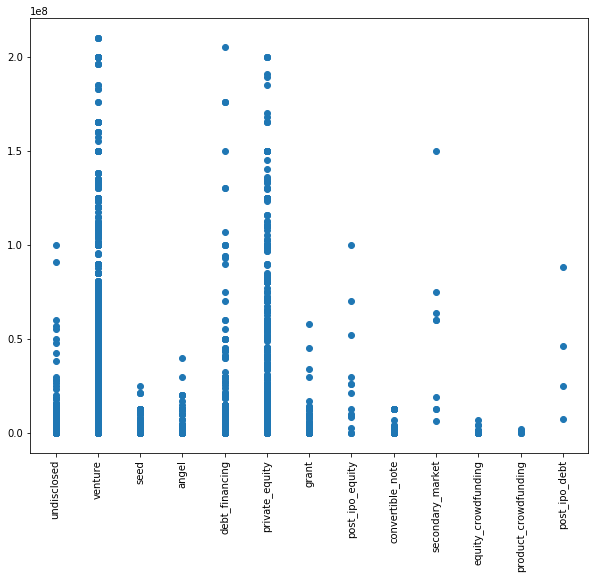

In [101]:
plt.figure(figsize=(10,8))
plt.xticks(rotation='vertical')
plt.scatter(filter_funds['funding_round_type'],filter_funds['raised_amount_usd'])

In [102]:
filter_funds.sort_values(by='raised_amount_usd',ascending=False)

,company_name,company_market,company_city,investor_name,investor_market,investor_city,funding_round_type,funded_at,funded_quarter,funded_year,raised_amount_usd
23638,Flipkart,Online Shopping,Bangalore,Naspers,Media,Cape Town,venture,2014-05-26,2014-Q2,2014,210000000.00
23635,Flipkart,Online Shopping,Bangalore,DST Global,Software,Surbiton,venture,2014-05-26,2014-Q2,2014,210000000.00
25845,Ola (ANI Technologies Pvt. Ltd.),Transportation,Bangalore,SoftBank,Media,Tokyo,venture,2014-10-25,2014-Q4,2014,210000000.00
23640,Flipkart,Online Shopping,Bangalore,Tiger Global Management,Investment Management,New York,venture,2014-05-26,2014-Q2,2014,210000000.00
19434,Highwinds,Software,Winter Park,Goldman Sachs,Finance,New York,debt_financing,2013-08-08,2013-Q3,2013,205000000.00
11826,Better Place,Clean Technology,Palo Alto,General Electric,Media,Fairfield,venture,2011-11-11,2011-Q4,2011,200000000.00
16516,EDF Renewable Energy,Clean Technology,San Diego,Google,Software,Mountain View,private_equity,2013-01-10,2013-Q1,2013,200000000.00
21506,Crocs,Shoes,Niwot,Blackstone Group,Investment Management,New York,private_equity,2013-12-31,2013-Q4,2013,200000000.00
16984,Pinterest,Curated Web,San Francisco,Andreessen Horowitz,Venture Capital,Menlo Park,venture,2013-02-20,2013-Q1,2013,200000000.00
23482,Pinterest,Curated Web,San Francisco,Andreessen Horowitz,Venture Capital,Menlo Park,venture,2014-05-15,2014-Q2,2014,200000000.00


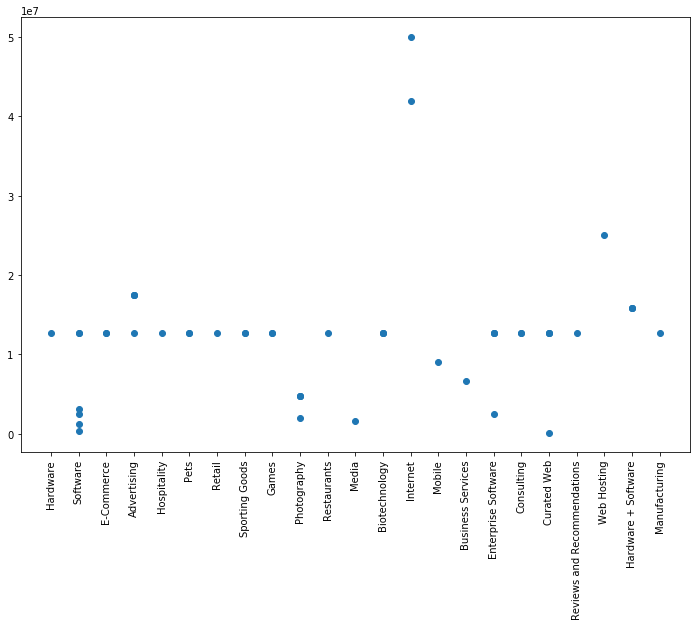

In [103]:
plt.figure(figsize=(12,8))
plt.xticks(rotation='vertical')
plt.scatter(filter_funds['company_market'].head(50),filter_funds['raised_amount_usd'].head(50))

#### Extract month from 'funded_at' column and drop it 
#### Created new column named as 'funded_month'

In [104]:
filter_funds['funded_month'] = pd.DatetimeIndex(filter_funds['funded_at']).month
filter_funds = filter_funds.drop('funded_at',axis=1)

In [105]:
filter_funds.head()

,company_name,company_market,company_city,investor_name,investor_market,investor_city,funding_round_type,funded_quarter,funded_year,raised_amount_usd,funded_month
0,Lenovo,Hardware,Morrisville,Chinese Academy Of Sciences,Education,Beijing,undisclosed,1984-Q1,1984,12663383.67,1
1,Cisco,Software,San Jose,Sequoia Capital,Venture Capital,Menlo Park,venture,1987-Q1,1987,2500000.00,1
2,Office Depot,E-Commerce,Boca Raton,Upfront Ventures,Finance,Los Angeles,undisclosed,1989-Q2,1989,12663383.67,6
3,Market Wire,Advertising,El Segundo,Perkins Coie,Legal,Anchorage,venture,1990-Q4,1990,17550000.00,11
4,Market Wire,Advertising,El Segundo,Sequoia Capital,Venture Capital,Menlo Park,venture,1990-Q4,1990,17550000.00,11


In [106]:
filter_funds['raised_amount_usd'] = filter_funds['raised_amount_usd'].astype(int)


###### y = raised_amount_usd

##### Convert categorial features to continous variable

In [107]:
dummies = filter_funds


In [108]:
dummies = dummies.drop('company_name',axis=1)

In [109]:
dummies = pd.get_dummies(data=dummies, columns=['funding_round_type','funded_year', 'funded_month','company_market','investor_market','funded_quarter'])

In [110]:
dummies.head()   

,company_city,investor_name,investor_city,raised_amount_usd,funding_round_type_angel,funding_round_type_convertible_note,funding_round_type_debt_financing,funding_round_type_equity_crowdfunding,funding_round_type_grant,funding_round_type_post_ipo_debt,...,funded_quarter_2012-Q3,funded_quarter_2012-Q4,funded_quarter_2013-Q1,funded_quarter_2013-Q2,funded_quarter_2013-Q3,funded_quarter_2013-Q4,funded_quarter_2014-Q1,funded_quarter_2014-Q2,funded_quarter_2014-Q3,funded_quarter_2014-Q4
0,Morrisville,Chinese Academy Of Sciences,Beijing,12663383,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,San Jose,Sequoia Capital,Menlo Park,2500000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Boca Raton,Upfront Ventures,Los Angeles,12663383,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,El Segundo,Perkins Coie,Anchorage,17550000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,El Segundo,Sequoia Capital,Menlo Park,17550000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [111]:
X = dummies.drop(['company_city', 'investor_name', 'investor_city','raised_amount_usd'],axis=1)
#X = dummies
X.head()

,funding_round_type_angel,funding_round_type_convertible_note,funding_round_type_debt_financing,funding_round_type_equity_crowdfunding,funding_round_type_grant,funding_round_type_post_ipo_debt,funding_round_type_post_ipo_equity,funding_round_type_private_equity,funding_round_type_product_crowdfunding,funding_round_type_secondary_market,...,funded_quarter_2012-Q3,funded_quarter_2012-Q4,funded_quarter_2013-Q1,funded_quarter_2013-Q2,funded_quarter_2013-Q3,funded_quarter_2013-Q4,funded_quarter_2014-Q1,funded_quarter_2014-Q2,funded_quarter_2014-Q3,funded_quarter_2014-Q4
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [112]:
y = filter_funds.drop(['company_name','company_market', 'company_city', 'investor_name',
    'investor_market', 'investor_city', 'funding_round_type',
     'funded_quarter', 'funded_year', 'funded_month'],axis=1)
y.head()

,raised_amount_usd
0,12663383
1,2500000
2,12663383
3,17550000
4,17550000


In [113]:
from sklearn.model_selection import train_test_split

#### train_test_split will select random train and test data 
#### if you want to don't make it randomize the use  random_state=10

In [114]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2) 

In [115]:
from sklearn.linear_model import LinearRegression
clf = LinearRegression()

In [116]:
clf.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [117]:
tr_pred = clf.predict(X_test)
tr_pred

array([[17956864.],
       [21659648.],
       [ 1785856.],
       ...,
       [12550144.],
       [ 7618560.],
       [24477696.]])

#### Root mean squared error 

In [118]:
np.sqrt(np.mean((y_test-tr_pred)**2))

raised_amount_usd   1779458554270279424.00
dtype: float64

In [119]:
from sklearn.metrics import mean_squared_error

### Mean squared error

In [120]:
mean_squared_error(y_test,tr_pred)

3.166472746365673e+36

In [121]:
X_train.shape

(20864, 1002)

## KNeighbors with 
### Root mean squared error 
### Mean squared error

In [122]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=5)

In [123]:
knn.fit(X_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=5, p=2,
          weights='uniform')

In [124]:
k_pred = knn.predict(X_test)

In [125]:
np.sqrt(np.mean((y_test-k_pred)**2))

raised_amount_usd   17732186.72
dtype: float64

In [126]:
mean_squared_error(y_test,k_pred)

314430445910903.9